# Metadata

```yaml
Course:  DS 5100
Module:  07 Python Classes
Topic:   HW 07 Stock Class
Author:  R.C. Alvarado
Date:    7 July 2023
```

# Student Info

* Name: Sarah Hall
* Net UD: CEJ2VH
* URL of this file in GitHub: https://github.com/CEJ2VH/DS5100-activities/blob/main/activities/M07-HW-2-1.ipynb

# Instructions

In your **private course repo on Rivanna**, use this Jupyter notebook and the data file described to write code that performs the tasks below. 

Save your notebook in the `M07` directory.

Remember to add and commit these files to your repo. 

Then push your commits to your repo on GitHib.

Be sure to fill out the **Student Info** block above.

To submit your homework, save the notebook as a PDF and upload it to GradeScope, following the instructions.

**TOTAL POINTS: 12**

# Overview

In this assignment you will define a class and use it to perform the requested tasks.

Before answering the questions, read the market data from `apple_data.csv` into a Pandas dataframe. The file is in the HW for this module in the course repo.

# Setting Up

In [1]:
import pandas as pd
import numpy as np

# Prepare the Data

Read in the dataset from the attached file `apple_data.csv` using `pd.read_csv()`.  

In [2]:
# CODE HERE
appstock=pd.read_csv('apple_data-2.csv')
appstock.dtypes

date          object
adj_close    float64
dtype: object

In [3]:
appstock['date']

0      2020-01-02
1      2020-01-03
2      2020-01-06
3      2020-01-07
4      2020-01-08
          ...    
130    2020-07-09
131    2020-07-10
132    2020-07-13
133    2020-07-14
134    2020-07-15
Name: date, Length: 135, dtype: object

# Task 1 

(5 PTS) 

Define a class with these features:

**Class Name**: `Stock`

**Attributes**:
- `ticker`: a string to hold the stock symbol
- `sector`: a string to hold the sector name
- `prices`: a dataframe to hold the prices for the stock

**Methods**:
- `print_sector` to just print out the sector string.
- `get_row_count` to count the number of rows in the price dataframe. Set an attribute "price_records" equal to this count.
-`__init__` to build objects. Initialize with the three attribute values passed to the constructor.

In [43]:
# CODE HERE
class Stock():
    """Class to hold ticker label, sector, and prices of a stock

    Attributes
    ----------
    ticker : str 
        Ticker label for stock market
        
    sector : str 
        Sector of the stock market to which the stock belongs
        
    prices : Dataframe 
        List of stock prices

    Methods
    -------
    __init__(self, ticker, sector, prices):
        Constructor
    
    def print_sector(self):
        
    
    def get_row_count(self):

    """
        #initially sets price_records to 0, and is overwritten
    price_records=0
    def __init__(self, ticker, sector, prices):
        self.ticker = ticker
        self.sector=sector
        self.prices=prices

    def print_sector(self):
        print(self.sector)
        
    def get_row_count(self):
        price_records=self.prices.shape[0]
        print('The number of prices is : ' + str(price_records))

# Task 2

(1 PT) 

Create an instance of your class with the these initial values: 
- `ticker`: 'AAPL'
- `sector`: 'technology'
- `prices`: _the imported price dataframe_
          
Then Use the dot operator to print the stock's ticker.   

In [5]:
# CODE HERE
apple=Stock('AAPL','technology',appstock)

# Task 3 

(1 PT) 

Use the `print_sector()` method to print the sector.

In [6]:
# CODE HERE
apple.print_sector()

technology


# Task 4 

(2 PTS) 

Use the `get_row_count()` method to compute the number of price records and set price_records.

Use the dot operator to access the stock's price_records, printing the result.

In [7]:
# CODE HERE
apple.get_row_count()

The number of prices is : 135


# Task 5

(1 PT) 

Add a new column called `'month'` to the `prices` attribute and put the month number there. 

Hint: You can use `.apply()` with a lambda function to split the month string and keep the second element.

In [8]:
# CODE HERE
month = appstock['date'].apply(lambda x: x.split('-')[1])
#month= appstock['date'].apply(lambda x: str(x) if isinstance(x, int) else x)
month

0      01
1      01
2      01
3      01
4      01
       ..
130    07
131    07
132    07
133    07
134    07
Name: date, Length: 135, dtype: object

In [9]:
apple.prices.insert(1, "month", month)
apple.prices.head()

,date,month,adj_close
0,2020-01-02,01,298.829956
1,2020-01-03,01,295.924713
2,2020-01-06,01,298.282715
3,2020-01-07,01,296.879883
4,2020-01-08,01,301.655548


# Task 6

(1 PT)

Use `.groupby()` to compute the mean `adj_close` by month. Save your result is a dataframe, not a series.

In [37]:
# CODE HERE
avg_appl_month=apple.prices.groupby('month')['adj_close'].mean().to_frame()
#avg_appl_month=apple.prices.groupby('month').agg({'adj_close':'mean'})
avg_appl_month

,adj_close
month,
01,310.337596
02,310.271843
03,261.735581
04,271.650839
05,309.785164
06,345.806360
07,378.385999


In [38]:
avg_appl_month.columns

Index(['adj_close'], dtype='object')

In [11]:
# Another method
# my_stock.prices.groupby('month').agg({'adj_close':'mean'})

# Task 7

(1 PT)

Plot the mean `adj_close` by month using a simple line plot.

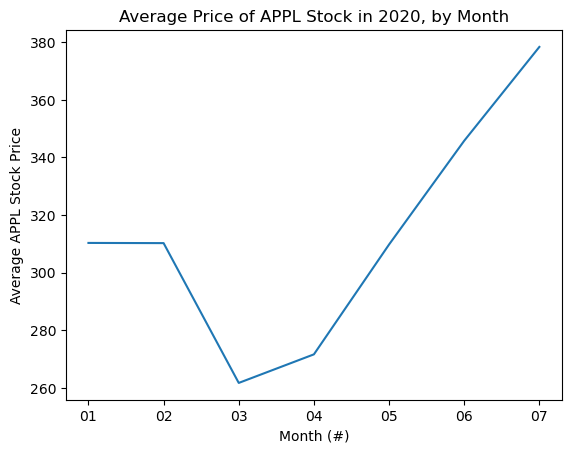

In [42]:
# CODE HERE
import matplotlib.pyplot as plt
plt.plot(list(avg_appl_month.index.values), avg_appl_month['adj_close'])
plt.xlabel('Month (#)')
plt.ylabel('Average APPL Stock Price')
 
# displaying the title
plt.title("Average Price of APPL Stock in 2020, by Month")
plt.show()